# 1 .Building Custom Linear Regression Model using Pytorch


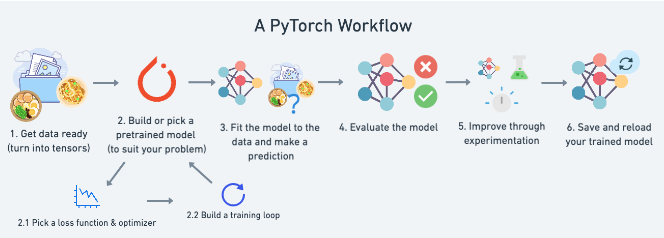

In [1]:
what_i_am_going_to_learn= {1 : "data (prepare and load)",
                           2 : "build model",
                           3 : "fitting the model to data (training)",
                           4 : "making prediction and evaluating a model (inference)",
                           5 : "Saving and loading a model",
                           6 : "putting it all together"}
what_i_am_going_to_learn

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluating a model (inference)',
 5: 'Saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn  ## nn conatains all of Pytorch's building block for neuroal network
import matplotlib.pyplot as plt


In [3]:
torch.__version__

'2.0.1+cu118'

## 1. Data (Preparing and loading)
Data can be anything ... in machine learning.

* Excel speadsheet
* Image of any kind
* Video (YouTube has lots of data ...)
* Audio like song or podcast
* DNA
* Text

Machine learning is a game of two parts :

1. Getting data into a numerical representaion.
2. Build a model to learn pattern in that numerical representation

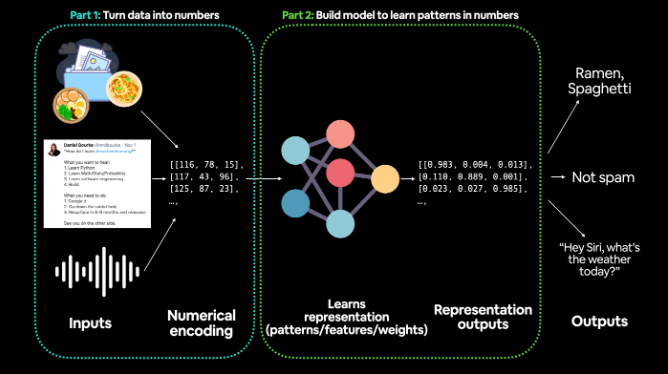

### **To showcase this let's create some *known* data using the linear Regression formula**

In [4]:
## Creating  known parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 3
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias



In [5]:
print(f"length of x is {len(x)}, and y is {len(y)}")

length of x is 150, and y is 150


In [6]:
x[:5],y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

### spliting data into training and testing sets

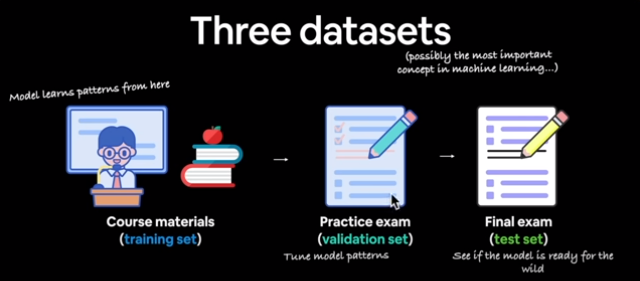

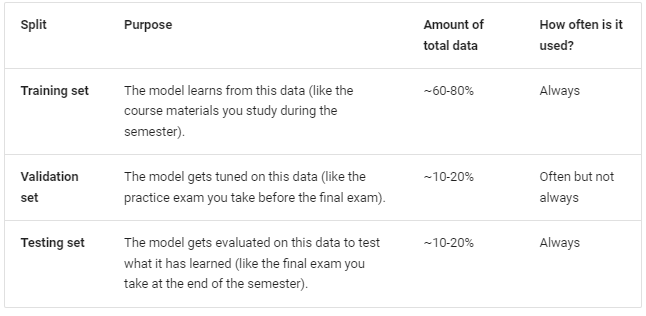

In [7]:
### Create a train/test split
train_split = int(0.8*len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train) , len(y_train), len(x_test), len(y_test)

(120, 120, 30, 30)

How might we better visualize our data?

This is where the data explore's motto comes in!

**"Visulize visulize and visulaize ..... hahaaa"**

In [8]:
def plot_prediction(train_data = x_train,
                    train_label = y_train,
                    test_data = x_test,
                    test_label = y_test,
                    prediction = None):
  """
  Ploting training data, test data and compare the predictions.
  """
  plt.figure(figsize = (6, 4 ))

  # plot training data in blue
  plt.scatter(train_data, train_label, c='b', s=4, label ='Trainig data')

  ## Plot test data in green
  plt.scatter(test_data, test_label, c='g', s=4, label ='Trainig data')

  #Are there prediction?
  if prediction is not None:
      # Plot the prediction if they exist
      plt.scatter(test_data, prediction, c ='r', s=4, label='Preditions')
  plt.legend()


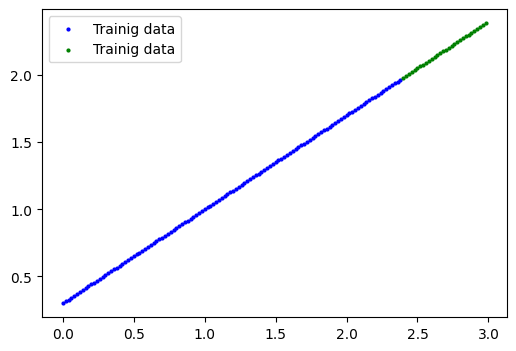

In [9]:
plot_prediction()

##  2. Build Model

*Our first Pytorch Model... Hahahaaa... ;)*

This is very exciting for me ... hahaa.. Let's Do it!



In [10]:
torch.randn(1,
          requires_grad= True,
          dtype = torch.float)

tensor([-1.3198], requires_grad=True)

In [11]:
from torch import nn
### Creating a Linear regresion model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        ## Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,                      ## firstly i am initilizing small random wights
                                                requires_grad= True,  ## this parameter be updated via gradient descent
                                                dtype = torch.float)) ## pytorch by defualt taking torch.float32

        self.bias = nn.Parameter(torch.randn(1,                     ## here also taking samll random biases
                                             requires_grad=True,
                                             dtype = torch.float))

        ## Forward method to define the computation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias ## this is the linear regression formula ""y= mx+c""


### Checking the contents of our model
So we can chack our model parameters or what's inside our model using `.parameters()`

In [12]:
## Creating a random seed
torch.manual_seed(42)
# create an instance of our model (this is a subclass of nn.Model)
model_0 = LinearRegressionModel()

## Let's check out the parameter
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
## list of the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
## my acutal weight and bias
weight, bias

(0.7, 0.3)

In [15]:

## my initial random wight and bias giving this
# ('weights', tensor([0.3367])), ('bias', tensor([0.1288]))
# now i have to my model to adjust this weight and bias

## Making prediction using `torch.inference_mode()`

to check our model's predictive power, let's see how well it predicts `y test` based on  `x test`.

When we pass data through our model, it's going to run it through the forword method

In [16]:
## Make prediction with model

with torch.inference_mode():
  y_preds = model_0(x_test)
y_preds

tensor([[0.9369],
        [0.9436],
        [0.9503],
        [0.9571],
        [0.9638],
        [0.9705],
        [0.9773],
        [0.9840],
        [0.9907],
        [0.9975],
        [1.0042],
        [1.0109],
        [1.0177],
        [1.0244],
        [1.0311],
        [1.0379],
        [1.0446],
        [1.0513],
        [1.0581],
        [1.0648],
        [1.0715],
        [1.0783],
        [1.0850],
        [1.0917],
        [1.0985],
        [1.1052],
        [1.1119],
        [1.1187],
        [1.1254],
        [1.1321]])

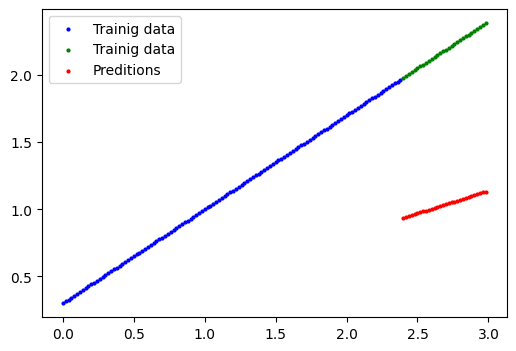

In [17]:
## Let's Visulize the prediction
plot_prediction(prediction=y_preds)

In [18]:
### Why the prediction is so far from actual value,
## becuase i have initilize my wights and bias on the top of small random values

## 3. Training model

The whole idea of training is for a model to move from unknown parameters(these may be random ) to some known parameter

or in other words from a poor representaion of the data to a better representaion of the data

We need to train:

* **Loss fuction** : A fuction to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **Optimizer** :Takes into account the loss of a model and adjusts the models parameters (weights and bias)

In [19]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [21]:
## Let's setup  a loss fucntion
loss_fn = nn.L1Loss() ## "L1Loss()" this is nothing but it's a MAE

# Let's setup an optimizer
## OPTIMIZER adust our weight and bias
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.001) ## lr learning rate  is most important hyperparameters
                            ## learning rate said the--: higher learning rate the most adjust each and every parameter(weights and bias) in one go


### Building a training and testing loop

A couple of things we need in training loop:
1. Loop through the data
2. forward pass  (this involve data moving through our model's `foward()` fuction) to make a predictions on data - also called forward propagation
3. Calculate the loss (comapre forwad pass prediction to ground truth table)
4. Optimizer zero grad
5. Back Propagation
6. optimizer steps -  use the optimizer to adjust our model's parameters to try and improve the loss


In [22]:
torch.manual_seed(42)
epochs = 20

# Loop through the data for training
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # Forward pass
    y_pred = model_0(x_train)

    # Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss :{loss}")

    # Backpropagation
    loss.backward()

    # Optimizer step to update parameters
    optimizer.step()


    model_0.eval() # it trun off gradient tracting

Loss :0.6035290360450745
Loss :0.601112961769104
Loss :0.5962807536125183
Loss :0.5890324115753174
Loss :0.5793680548667908
Loss :0.5672875046730042
Loss :0.5527908205986023
Loss :0.5358782410621643
Loss :0.5165494084358215
Loss :0.4948045015335083
Loss :0.4706435203552246
Loss :0.4440663754940033
Loss :0.4150732159614563
Loss :0.38366392254829407
Loss :0.349838525056839
Loss :0.31359702348709106
Loss :0.2749393880367279
Loss :0.2338656485080719
Loss :0.19037583470344543
Loss :0.14570392668247223


In [23]:
## first epoch updation
model_0.state_dict()

OrderedDict([('weights', tensor([0.5866])), ('bias', tensor([0.3387]))])

In [24]:
# again i run the train looop and print the parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.5866])), ('bias', tensor([0.3387]))])

In [25]:
# see the updata in weight and bias it's learning

In [26]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

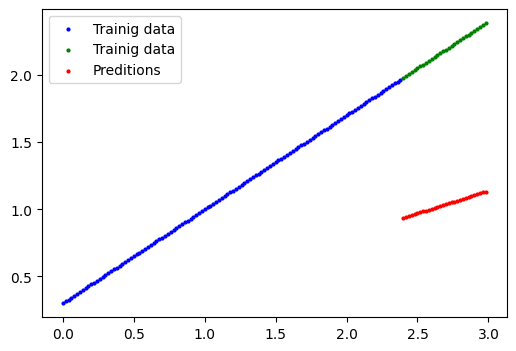

In [27]:
plot_prediction(prediction=y_preds)

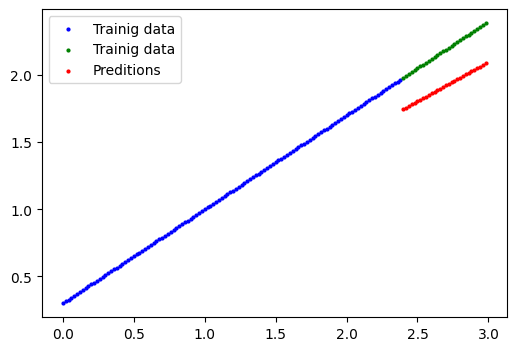

In [28]:

plot_prediction(prediction=y_preds_new)

### Suerb our Model is adjusting after some epochs

### let's re-run our code and train on random epochs

In [29]:
## Creating a random seed
torch.manual_seed(40)
# create an instance of our model (this is a subclass of nn.Model)
model_1 = LinearRegressionModel()

## Let's check out the parameter
list(model_1.parameters())

[Parameter containing:
 tensor([0.9307], requires_grad=True),
 Parameter containing:
 tensor([-0.3482], requires_grad=True)]

In [30]:
## Let's setup  a loss fucntion
loss_fn = nn.L1Loss() ## "L1Loss()" this is nothing but it's a MAE

# Let's setup an optimizer
## OPTIMIZER adust our weight and bias
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.00001)

In [31]:
torch.manual_seed(42)
epochs = 100

## Track Different values
epoch_count = []
loss_values = []
test_loss_values = []

# Loop through the data for training
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # Forward pass
    y_pred_epochs = model_0(x_train)

    # Calculate the loss
    loss = loss_fn(y_pred_epochs, y_train)

    # Backpropagation
    loss.backward()

    # Optimizer step to update parameters
    optimizer.step()

    ## Testing
    model_0.eval() # (different settings in the model not needed for evluation)

    with torch.inference_mode():  # Use torch.no_grad() to turn off gradient tracking for testing
        # 1. Do the forward pass
        test_pred = model_0(x_test)

        # Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,  y_test)

        #Let's print what happing every 10 epochs
        if epoch %10==0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch :{epoch} | Loss :{loss} | Test loss :{test_loss}")
            print(model_0.state_dict())


Epoch :0 | Loss :0.10209652781486511 | Test loss :0.26552122831344604
OrderedDict([('weights', tensor([0.5868])), ('bias', tensor([0.3389]))])
Epoch :10 | Loss :0.09703473746776581 | Test loss :0.2546893358230591
OrderedDict([('weights', tensor([0.5900])), ('bias', tensor([0.3413]))])
Epoch :20 | Loss :0.09034940600395203 | Test loss :0.24013684689998627
OrderedDict([('weights', tensor([0.5942])), ('bias', tensor([0.3445]))])
Epoch :30 | Loss :0.08222953230142593 | Test loss :0.22194547951221466
OrderedDict([('weights', tensor([0.5996])), ('bias', tensor([0.3482]))])
Epoch :40 | Loss :0.07293810695409775 | Test loss :0.20022781193256378
OrderedDict([('weights', tensor([0.6060])), ('bias', tensor([0.3526]))])
Epoch :50 | Loss :0.06286042183637619 | Test loss :0.17513741552829742
OrderedDict([('weights', tensor([0.6135])), ('bias', tensor([0.3574]))])
Epoch :60 | Loss :0.052583400160074234 | Test loss :0.14691190421581268
OrderedDict([('weights', tensor([0.6221])), ('bias', tensor([0.362

In [32]:
with torch.inference_mode():
    y_pred_epochs = model_0(x_test)

In [33]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6620])), ('bias', tensor([0.3846]))])

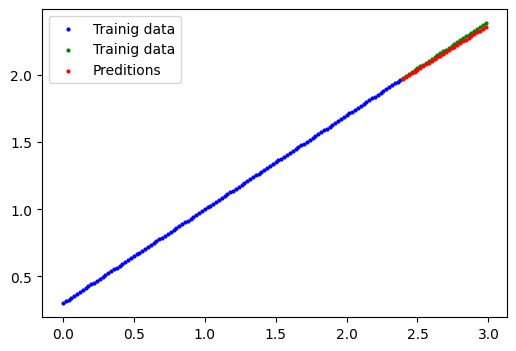

In [34]:
plot_prediction(prediction=y_pred_epochs)

### Let's Plot the loss curve

In [35]:
loss_values, test_loss_values

([tensor(0.1021, grad_fn=<MeanBackward0>),
  tensor(0.0970, grad_fn=<MeanBackward0>),
  tensor(0.0903, grad_fn=<MeanBackward0>),
  tensor(0.0822, grad_fn=<MeanBackward0>),
  tensor(0.0729, grad_fn=<MeanBackward0>),
  tensor(0.0629, grad_fn=<MeanBackward0>),
  tensor(0.0526, grad_fn=<MeanBackward0>),
  tensor(0.0430, grad_fn=<MeanBackward0>),
  tensor(0.0357, grad_fn=<MeanBackward0>),
  tensor(0.0331, grad_fn=<MeanBackward0>)],
 [tensor(0.2655),
  tensor(0.2547),
  tensor(0.2401),
  tensor(0.2219),
  tensor(0.2002),
  tensor(0.1751),
  tensor(0.1469),
  tensor(0.1159),
  tensor(0.0827),
  tensor(0.0482)])

In [36]:
## let's convert into in numpy
import numpy as np
loss_values = np.array(torch.tensor(loss_values))
test_loss_values = np.array(torch.tensor(test_loss_values))

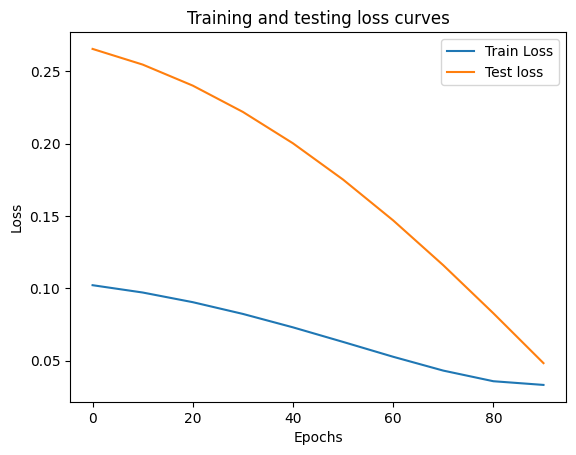

In [37]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and testing loss curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

### Let's save our model

There are there main methods, with the help of these methods we can save and load our models in pytorch

1. `torch.save()` - this is allows us to save our model in pickel formate
2. `torch.load()` -allows us to load a saved pytorch object
3. `torch.nn.Model.load.stat_dict()` -this allows to load a model's saved stae dictionary

In [38]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6620])), ('bias', tensor([0.3846]))])

In [39]:
## Saving our PyTorch model
from pathlib import Path

# 1. Creating a model Directroy
MODEL_PATH = Path('Model')
MODEL_PATH.mkdir(parents = True, exist_ok=True)

# 2. Creating model save path
MODEL_NAME = '01_pytorch_workflow_model.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Saveing model state_dict() formate

print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to :Model/01_pytorch_workflow_model.pth


# We successfully saved our model, and we're now celebrating with cheers of triumph!

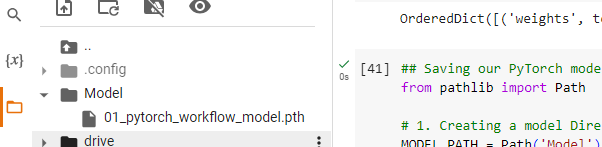

In [40]:
!ls -l Model

total 4
-rw-r--r-- 1 root root 1199 Sep 28 09:46 01_pytorch_workflow_model.pth


## Let's Load our model


In [41]:
## To load in saved state_dict we have to instanctiate a new instance of our model
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [42]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6620])), ('bias', tensor([0.3846]))])

In [43]:
## Let's make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)

In [44]:
loaded_model_preds = loaded_model_preds.detach().numpy().tolist()

In [45]:
y_test = y_test.detach().numpy().tolist()

In [46]:
import pandas as pd
df = pd.DataFrame({'Predicted': loaded_model_preds, 'Actual': y_test})

# Print the DataFrame
print(df)

               Predicted                Actual
0   [1.9735325574874878]  [1.9800000190734863]
1   [1.9867732524871826]    [1.99399995803833]
2    [2.000013828277588]   [2.008000135421753]
3   [2.0132546424865723]  [2.0220000743865967]
4   [2.0264952182769775]  [2.0360000133514404]
5    [2.039735794067383]   [2.049999952316284]
6    [2.052976608276367]   [2.063999891281128]
7   [2.0662174224853516]   [2.078000068664551]
8    [2.079457998275757]  [2.0920000076293945]
9    [2.092698574066162]  [2.1059999465942383]
10  [2.1059393882751465]   [2.119999885559082]
11   [2.119180202484131]   [2.133999824523926]
12   [2.132420778274536]  [2.1480000019073486]
13  [2.1456613540649414]  [2.1619999408721924]
14   [2.158902168273926]   [2.175999879837036]
15    [2.17214298248291]   [2.190000057220459]
16  [2.1853837966918945]  [2.2039999961853027]
17  [2.1986241340637207]  [2.2179999351501465]
18   [2.211864948272705]  [2.2319998741149902]
19  [2.2251057624816895]   [2.246000051498413]
20  [2.238346

# 2. Creating a Model Using PyTorch's `nn.Module` Library

## 2.1 Data

In [47]:
import torch
import matplotlib.pyplot as plt

In [48]:
## Again i am creating same data which i created earlier for regrassion model
weight = 0.7
bias = 0.3

x = torch.arange(0, 5, step=0.2).unsqueeze(1)
y = weight * x + bias

In [49]:
len(x),len(y)

(25, 25)

In [50]:
x[:5], y[:5]

(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000]]),
 tensor([[0.3000],
         [0.4400],
         [0.5800],
         [0.7200],
         [0.8600]]))

In [51]:
## split the data
train_split = int(0.8 * len(x))

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

In [52]:
print(f"train data shape : {x_train.shape} {y_train.shape}")
print(f"test data shape : {x_test.shape} {y_test.shape}")

train data shape : torch.Size([20, 1]) torch.Size([20, 1])
test data shape : torch.Size([5, 1]) torch.Size([5, 1])


In [53]:
def plot_prediction(train_data = x_train,
                    train_label = y_train,
                    test_data = x_test,
                    test_label = y_test,
                    prediction = None):
  """
  Ploting training data, test data and compare the predictions.
  """
  plt.figure(figsize = (6, 4 ))

  # plot training data in blue
  plt.scatter(train_data, train_label, c='b', s=4, label ='Trainig data')

  ## Plot test data in green
  plt.scatter(test_data, test_label, c='g', s=4, label ='Trainig data')

  #Are there prediction?
  if prediction is not None:
      # Plot the prediction if they exist
      plt.scatter(test_data, prediction, c ='r', s=4, label='Preditions')
  plt.legend()


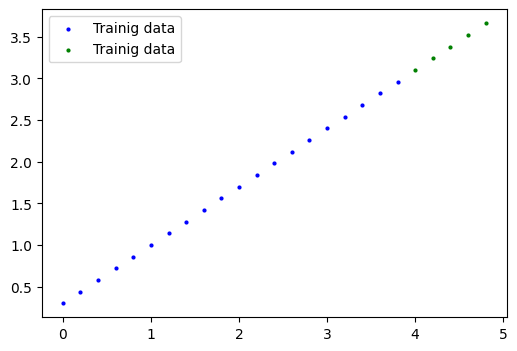

In [54]:
plot_prediction()

### Building a pytorch model

In [55]:
print("X_train shape:", x_train.size())
print("X_test shape:", x_test.size())
print("y_train:", y_train.size())
print("y_test:", y_test.size())

X_train shape: torch.Size([20, 1])
X_test shape: torch.Size([5, 1])
y_train: torch.Size([20, 1])
y_test: torch.Size([5, 1])


In [56]:
import torch
import torch.nn as nn

# Creating a linear model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Using nn.Linear() to create the model parameters
        self.linear_layer = nn.Linear(in_features=1, # input feature
                                      out_features=1 # output layer
                                     )
        ## nn.Linear() applies a linear transformation to the incoming data "y = m*x.T + c"

    def forward(self, x):
        return self.linear_layer(x)

# Let's set the manual seed
torch.manual_seed(0)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()


(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.0075]])),
              ('linear_layer.bias', tensor([0.5364]))]))

## Let's train this model

For training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [57]:
## set a loss fuction
loss_fn = nn.L1Loss()

#setup our Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr= 0.001)


In [58]:
torch.manual_seed(43)
epochs = 24
## Track Different values
epoch_count = []
loss_values = []
test_loss_values = []

# Loop through the data for training
for epoch in range(epochs):
    # Set the model to training mode
    model_1.train()

    # Forward pass
    y_pred_epochs = model_1(x_train)

    # Calculate the loss
    loss = loss_fn(y_pred_epochs, y_train)

    # Backpropagation
    loss.backward()

    # Optimizer step to update parameters
    optimizer.step()

    ## Testing
    model_1.eval() # (different settings in the model not needed for evluation)

    with torch.inference_mode():  # Use torch.no_grad() to turn off gradient tracking for testing
        # 1. Do the forward pass
        test_pred = model_1(x_test)

        # Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,  y_test)

        #Let's print what happing every 10 epochs

        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch :{epoch} | Loss :{loss} | Test loss :{test_loss}")
        print(model_1.state_dict())


Epoch :0 | Loss :1.1409204006195068 | Test loss :2.8674263954162598
OrderedDict([('linear_layer.weight', tensor([[-0.0056]])), ('linear_layer.bias', tensor([0.5372]))])
Epoch :1 | Loss :1.1367460489273071 | Test loss :2.8492822647094727
OrderedDict([('linear_layer.weight', tensor([[-0.0018]])), ('linear_layer.bias', tensor([0.5388]))])
Epoch :2 | Loss :1.1283972263336182 | Test loss :2.822066307067871
OrderedDict([('linear_layer.weight', tensor([[0.0038]])), ('linear_layer.bias', tensor([0.5412]))])
Epoch :3 | Loss :1.1158738136291504 | Test loss :2.785778045654297
OrderedDict([('linear_layer.weight', tensor([[0.0113]])), ('linear_layer.bias', tensor([0.5444]))])
Epoch :4 | Loss :1.099176287651062 | Test loss :2.7404181957244873
OrderedDict([('linear_layer.weight', tensor([[0.0207]])), ('linear_layer.bias', tensor([0.5484]))])
Epoch :5 | Loss :1.0783042907714844 | Test loss :2.685986280441284
OrderedDict([('linear_layer.weight', tensor([[0.0320]])), ('linear_layer.bias', tensor([0.5532

In [59]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5411]])),
             ('linear_layer.bias', tensor([0.7509]))])

In [60]:
with torch.inference_mode():
    y_pred = model_1(x_test)

In [61]:
len(x_test),len(y_pred)

(5, 5)

In [62]:
## let's convert into in numpy
import numpy as np
loss_values = np.array(torch.tensor(loss_values))
test_loss_values = np.array(torch.tensor(test_loss_values))

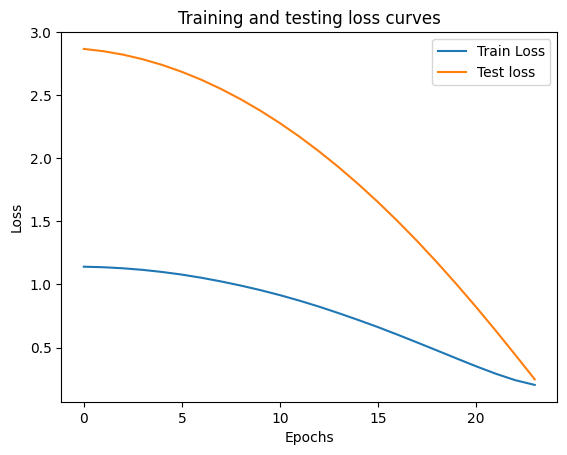

In [63]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title("Training and testing loss curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

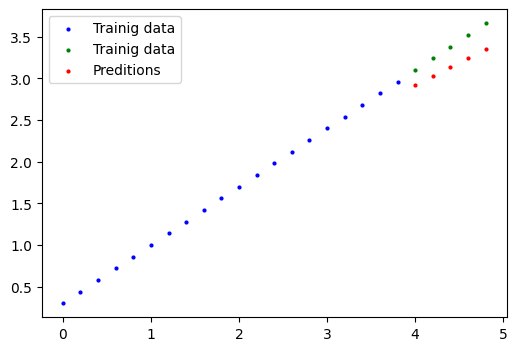

In [64]:
plot_prediction(prediction=y_pred)